## This Script Shows the pattern between caller and Calle. It shows who is calling to whom and how many time they have called each other and what is the duration of each call. It also find the duration of their each calls. Furthermore, it also plot some correlation between few parameters of the dataset. In the end a social relationship graphs are plot between calller and callee. 

In [76]:
import pandas as pd
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("CDR_20200101.csv", sep=";", header=0)

In [77]:
# This cell is just for testing purpose. To show the values. 

df['calleee164'].iloc[3] = 69802917842461
df['callere164'].iloc[3] = 2244112813

df['calleee164'].iloc[6] = 69802917263915
df['callere164'].iloc[6] = 2244112813

df['calleee164'].iloc[8] = 69802917263915
df['callere164'].iloc[8] = 2244112813

df['calleee164'].iloc[9] = 69802917122402
df['callere164'].iloc[9] = 2244112813

df['calleee164'].iloc[11] = 69802917122402
df['callere164'].iloc[11] = 2244112813

df['from_unixtime(starttime/1000)'][3] = df['from_unixtime(starttime/1000)'][1]
df['from_unixtime(starttime/1000)'][6] = df['from_unixtime(starttime/1000)'][1]
df['from_unixtime(starttime/1000)'][8] = df['from_unixtime(starttime/1000)'][1]

df['from_unixtime(starttime/1000)'][9] = df['from_unixtime(starttime/1000)'][1]
df['from_unixtime(starttime/1000)'][11] = df['from_unixtime(starttime/1000)'][1]

df.head(10)

,id,from_unixtime(starttime/1000),from_unixtime(stoptime/1000),callere164,callergatewayh323id,calleee164,holdtime,fee,endreason,enddirection,callerip,calleeip,pdd
0,12808967,2019-12-31 23:59:59,2019-12-31 23:59:59,3510657129,Iristelecom,69802917502873,0,0.000000,-39,1,208.89.130.102,172.105.10.232,448594193
1,12808968,2019-12-31 23:47:07,2020-01-01 00:00:02,2244112813,Iristelecom,69802917842461,775,5.870625,-7,0,208.89.130.102,172.105.10.232,1061093716
2,12808969,2020-01-01 00:00:04,2020-01-01 00:00:04,3652930910,Iristelecom,69802917347084,0,0.000000,-39,1,208.89.130.102,172.105.10.232,882050952
3,12808970,2019-12-31 23:47:07,2020-01-01 00:00:06,2244112813,Iristelecom,69802917842461,0,0.000000,-39,1,208.89.129.49,172.105.10.232,1965555921
4,12808971,2019-12-31 23:58:22,2020-01-01 00:00:05,4623530376,Iristelecom,69802917263915,103,0.780225,-7,0,208.89.130.102,172.105.10.232,1014373253
5,12808972,2019-12-31 23:52:36,2020-01-01 00:00:07,6047910592,Iristelecom,69802917210602,451,3.416325,-7,0,208.89.130.102,172.105.10.232,203358430
6,12808973,2019-12-31 23:47:07,2020-01-01 00:00:10,2244112813,Iristelecom,69802917263915,592,4.484400,-8,1,208.89.130.102,172.105.10.232,212468022
7,12808974,2020-01-01 00:00:13,2020-01-01 00:00:13,1722327049,Iristelecom,69802917144895,0,0.000000,-39,1,208.89.129.49,172.105.10.232,595853595
8,12808975,2019-12-31 23:47:07,2020-01-01 00:00:13,2244112813,Iristelecom,69802917263915,654,4.954050,-7,0,208.89.129.49,172.105.10.232,1047593241
9,12808976,2019-12-31 23:47:07,2020-01-01 00:00:13,2244112813,Iristelecom,69802917122402,431,3.264825,-7,0,208.89.130.102,172.105.10.232,569114850


In [78]:
df['from_unixtime(starttime/1000)'] = (df['from_unixtime(starttime/1000)']).astype('datetime64[ns]')
df['from_unixtime(stoptime/1000)'] = (df['from_unixtime(stoptime/1000)']).astype('datetime64[ns]')
difference_in_minutes = [(end - start).total_seconds() / 60 for start, end in zip(df['from_unixtime(starttime/1000)'], df['from_unixtime(stoptime/1000)'])]
df['Call Duration (min)'] = difference_in_minutes
df = df[df['Call Duration (min)']>0]
df['callere164']= df['callere164'].astype('string') 
df['calleee164']= df['calleee164'].astype('string') 

# Find duplicates based on columns callere164 and calleee164
grouped = df.groupby(['callere164', 'calleee164']).size().reset_index(name='count')

# Filter the original Dataframe to keep only the duplicate rows in new dataframe and remove all others. 
Filterd = df[df.duplicated(subset=['callere164', 'calleee164'], keep=False)]

# Add the count column to the original Dataframe so that i can illustrates that how many times each records are repeated.  
CallerCalleRelationhsipdf = Filterd.merge(grouped, on=['callere164', 'calleee164'], how='left')
CallerCalleRelationhsipdf

,id,from_unixtime(starttime/1000),from_unixtime(stoptime/1000),callere164,callergatewayh323id,calleee164,holdtime,fee,endreason,enddirection,callerip,calleeip,pdd,Call Duration (min),count
0,12808968,2019-12-31 23:47:07,2020-01-01 00:00:02,2244112813,Iristelecom,69802917842461,775,5.870625,-7,0,208.89.130.102,172.105.10.232,1061093716,12.916667,2
1,12808970,2019-12-31 23:47:07,2020-01-01 00:00:06,2244112813,Iristelecom,69802917842461,0,0.000000,-39,1,208.89.129.49,172.105.10.232,1965555921,12.983333,2
2,12808973,2019-12-31 23:47:07,2020-01-01 00:00:10,2244112813,Iristelecom,69802917263915,592,4.484400,-8,1,208.89.130.102,172.105.10.232,212468022,13.050000,2
3,12808975,2019-12-31 23:47:07,2020-01-01 00:00:13,2244112813,Iristelecom,69802917263915,654,4.954050,-7,0,208.89.129.49,172.105.10.232,1047593241,13.100000,2
4,12808976,2019-12-31 23:47:07,2020-01-01 00:00:13,2244112813,Iristelecom,69802917122402,431,3.264825,-7,0,208.89.130.102,172.105.10.232,569114850,13.100000,2
5,12808978,2019-12-31 23:47:07,2020-01-01 00:00:15,2244112813,Iristelecom,69802917122402,0,0.000000,-39,1,208.89.130.102,172.105.10.232,828375692,13.133333,2


## Correlation between Duration and Hold time

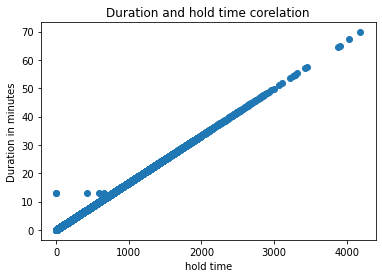

In [86]:
x = df['holdtime']
y = df['Call Duration (min)']
plt.scatter(x,y)
plt.title("Duration and hold time corelation")
plt.xlabel("hold time")
plt.ylabel("Duration in minutes")
plt.show()

### Correlation between Duration and fee

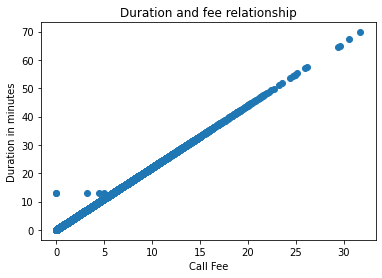

In [88]:
x = df['fee']
y = df['Call Duration (min)']
plt.scatter(x,y)
plt.title("Duration and fee relationship")
plt.xlabel("Call Fee")
plt.ylabel("Duration in minutes")
plt.show()

### Social Relationship Graphs

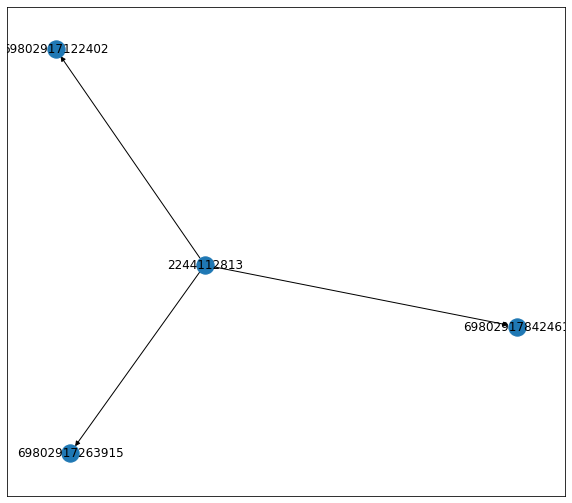

In [89]:
#from mpl_toolkits.basemap import Basemap as Basemap
graph = nx.from_pandas_edgelist(CallerCalleRelationhsipdf, source = 'callere164', target = 'calleee164',edge_attr = 'count',create_using = nx.DiGraph())
plt.figure(figsize = (10,9))
nx.draw_networkx(graph)
plt.show()